In [1]:
from impact_score.model.lgbm_model import ValorantLGBM
from matplotlib import pyplot as plt
import lightgbm
from impact_score.model.lgbm_loader import load_lgbm
import pandas as pd

vm: ValorantLGBM = load_lgbm()
model: lightgbm.LGBMClassifier = vm.model

Model path: E:\Python\Datascience_impact\impact_score\model\model.pkl
Model loading time: 0.005352499999999871


In [2]:
from impact_score.impact.match_analysis import RoundReplay

rr_instance = RoundReplay()
rr_instance.set_match(54292)
rr_instance.choose_round(5)
aux = rr_instance.get_round_probability(side="atk")
pd.DataFrame(aux)

Analyser created!
Model path: E:\Python\Datascience_impact\impact_score\model\model.pkl
Model loading time: 0.00835000000000008
Round 5 selected


,Round,EventID,EventType,Probability_before_event,Probability_after_event,Impact
36,5,0,start,0.486036,0.486036,0.000000
37,5,7145598,kill,0.511011,0.294967,0.216044
38,5,671874,plant,0.337930,0.337930,0.000000
39,5,7145600,kill,0.337930,0.568091,0.230161
40,5,7145594,kill,0.591115,0.814949,0.223834
41,5,7145596,kill,0.834936,0.659375,0.175560
42,5,7145599,kill,0.659375,0.376320,0.283055
43,5,7145595,kill,0.376320,0.630768,0.254448
44,5,7145597,kill,0.648018,0.322388,0.325630
45,5,7145601,kill,0.379091,0.024322,0.354769


In [6]:
feature_list = model.feature_name_
iex = {i: 0 for i in feature_list}

In [9]:
iex

{'RegularTime': 0,
 'SpikeTime': 0,
 'DEF_operators': 0,
 'Loadout_diff': 0,
 'ATK_kills': 0,
 'ATK_Initiator': 0,
 'ATK_Duelist': 0,
 'ATK_Sentinel': 0,
 'ATK_Controller': 0,
 'DEF_kills': 0,
 'DEF_Initiator': 0,
 'DEF_Duelist': 0,
 'DEF_Sentinel': 0,
 'DEF_Controller': 0}

In [10]:
iem = iex
regular_times = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
spike_times = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
regular_proba = []
spike_proba = []
iem["RegularTime"] = 0
iem["SpikeTime"] = 0
for x in regular_times:
    iem["RegularTime"] = x
    regular_proba.append(vm.test_probability(iem))
iem["RegularTime"] = 0
iem["SpikeTime"] = 0
for y in spike_times:
    iem["SpikeTime"] = y
    spike_proba.append(vm.test_probability(iem))

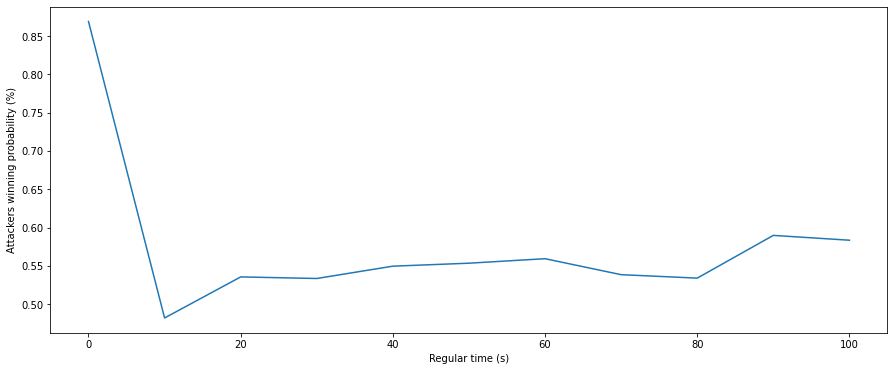

In [11]:
plt.figure(figsize=(15, 6))
plt.xlabel("Regular time (s)")
plt.ylabel("Attackers winning probability (%)")
plt.plot(regular_times, regular_proba)
plt.show()

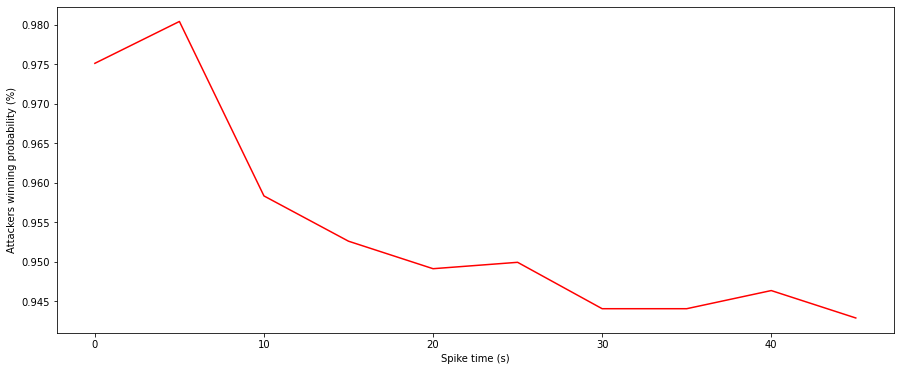

In [5]:
plt.figure(figsize=(15, 6))
plt.xlabel("Spike time (s)")
plt.ylabel("Attackers winning probability (%)")
plt.plot(spike_times, spike_proba, color="red")

In [14]:
vm.model.predict_proba(pd.DataFrame([iem]))

array([[0.08083727, 0.91916273]])

In [28]:
iem["RegularTime"] = 60
iem["SpikeTime"] = 0

In [31]:
vm.test_probability(iem)

0.4335205369012173